In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

x=[11003.61,11108.61,11133.33,11155.83,11183.33,11297.50,
   11310.28,11416.67,11423.89,11438.33,11461.11,11485.56,
   11503.06,11511.39,11522.22,11569.44,11583.33,11595.00,
   11600.00,11690.56,11715.83,11751.11,11770.28,11785.28,
   11822.78,11846.94,11963.06,11973.06,12058.33,12149.44,
   12286.94,12300.00,12355.83,12363.33,12372.78,12386.67,
   12421.67,12645.00]
y=[42102.50,42373.89,42885.83,42712.50,42933.33,42853.33,
   42929.44,42983.33,43000.28,42057.22,43252.78,43187.22,
   42855.28,42106.39,42841.94,43136.67,43150.00,43148.06,
   43150.00,42686.67,41836.11,42814.44,42651.94,42884.44,
   42673.61,42660.56,43290.56,43026.11,42195.56,42477.50,
   43355.56,42433.33,43156.39,43189.17,42711.39,43334.72,
   42895.56,42973.33]

for i in range(len(x)):
    print(x[i], y[i])

11003.61 42102.5
11108.61 42373.89
11133.33 42885.83
11155.83 42712.5
11183.33 42933.33
11297.5 42853.33
11310.28 42929.44
11416.67 42983.33
11423.89 43000.28
11438.33 42057.22
11461.11 43252.78
11485.56 43187.22
11503.06 42855.28
11511.39 42106.39
11522.22 42841.94
11569.44 43136.67
11583.33 43150.0
11595.0 43148.06
11600.0 43150.0
11690.56 42686.67
11715.83 41836.11
11751.11 42814.44
11770.28 42651.94
11785.28 42884.44
11822.78 42673.61
11846.94 42660.56
11963.06 43290.56
11973.06 43026.11
12058.33 42195.56
12149.44 42477.5
12286.94 43355.56
12300.0 42433.33
12355.83 43156.39
12363.33 43189.17
12372.78 42711.39
12386.67 43334.72
12421.67 42895.56
12645.0 42973.33


In [15]:
ncity = len(x)
city_distance = np.zeros((ncity, ncity), dtype=np.float64)
for i in range(0, ncity):
    for j in range(i + 1, ncity):
        city_distance[i][j] = math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)
        city_distance[j][i] = city_distance[i][j]
city_distance

array([[   0.        ,  290.99404135,  793.99821618, ..., 1852.35555226,
        1624.7579288 , 1858.09203782],
       [ 290.99404135,    0.        ,  512.5364787 , ..., 1598.94704493,
        1412.89283122, 1649.18845063],
       [ 793.99821618,  512.5364787 ,    0.        , ..., 1331.30138875,
        1288.37674168, 1514.2002638 ],
       ...,
       [1852.35555226, 1598.94704493, 1331.30138875, ...,    0.        ,
         440.55250039,  444.22642988],
       [1624.7579288 , 1412.89283122, 1288.37674168, ...,  440.55250039,
           0.        ,  236.48353389],
       [1858.09203782, 1649.18845063, 1514.2002638 , ...,  444.22642988,
         236.48353389,    0.        ]])

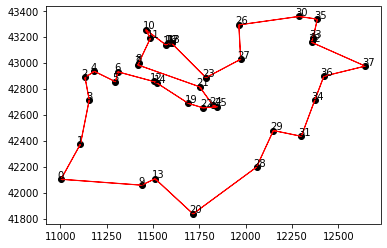

In [19]:
path_list = []
with open('out.txt', 'r') as file:
    for line in file:
        path_list.append(list(map(int, line.split())))

best_route = path_list[-1]
best_route.append(best_route[0])

plt.scatter(x, y, color="black")
for i in range(ncity):
   cur_idx = best_route[i]
   next_idx = best_route[i+1]
   plt.annotate(cur_idx, (x[cur_idx] - 18, y[cur_idx] + 10), size=10)
   plt.arrow(x[cur_idx], y[cur_idx], x[next_idx] - x[cur_idx], y[next_idx] -
            y[cur_idx], head_width=8, width=1, color="r", length_includes_head=True)